*Linear Regression on MNIST Dataset*

In [10]:
#Importing useful Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [11]:
def initialize_parameters(lenw):                                                ## Initialising Weights as 'w' and Bias term as 'b'
   w = np.random.randn(1,lenw)
   b = 0
   return w,b

In [12]:
def forward_prop(X,w,b):                                                        ## Creating a Hypothesis Function 'z'
   z = np.dot(w,X) + b
   return z

In [13]:
def cost_fuction(z,y):                                                          ## Creating a Cost Funtion with 'm' training examples
   m = y.shape[0]
   J = (1/2*m)*np.sum(np.square(z-y))
   return J

In [14]:
def back_prop(X,y,z):                                                           ## Computing Partial Derivative Terms
   m = y.shape[0]
   dz = (1/m)*(z-y)
   dw = np.dot(dz,X.T)
   db = np.sum(dz)
   return dw,db

In [15]:
def gradient_descent_update(w,b,dw,db,learning_rate):                           ## Updating Weights and Bias
   w = w-learning_rate*dw
   b = b-learning_rate*db
   return w,b

In [16]:
  def linear_regression_model(X_train,y_train,X_test,y_test,learning_rate,epochs):
   lenw = X_train.shape[0]
   w,b = initialize_parameters(lenw)
 
   costs_train = []
   m_train = y_train.shape[0]
   m_test = y_test.shape[0]
 
# "Epochs" is a Hyper Parameter that defines no of times the learning algorithm will work through entire dataset

   for i in range(1,epochs+1):                                                  ## Creating a Loop for Simultaneous Updating of 'w','b'
    z_train = forward_prop(X_train,w,b)
    cost_train = cost_fuction(z_train,y_train)                                  
    dw,db = back_prop(X_train,y_train,z_train)
    w,b = gradient_descent_update(w,b,dw,db,learning_rate)
 
 
    if i%10==0:
      costs_train.append(cost_train)
 
      MAE_train=(1/m_train)*np.sum(np.abs(z_train-y_train))                     ##Calculating Mean Absolute Errors of Training Examples
 
      z_test = forward_prop(X_test,w,b)
      cost_val = cost_fuction(z_test,y_test)
      MAE_val = (1/m_test)*np.sum(np.abs(z_test-y_test))
 
 
      print('Epochs'+str(i)+'/'+str(epochs)+':')
      print('Training cost'+str(cost_train)+'|'+'Validation cost'+str(cost_val))
      print('Training MAE'+str(MAE_train)+'|'+'Validation MAE'+str(MAE_val))
 
   plt.plot(costs_train)                                                        ##Visualising the Cost Function with Iterations
   plt.xlabel('iteration')
   plt.ylabel('training cost')
   plt.title('lr'+str(learning_rate))
   plt.show()

In [17]:
#Loading and Visualising the MNIST Training Dataset

df = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
df.head(),df.shape


(   0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
 0    6    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 1    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 2    7    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 3    9    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 4    5    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 
 [5 rows x 785 columns], (20000, 785))

In [18]:
df.describe(),df.info(),df.isnull().sum()                                       ##The Data is free from Null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


(                0        1        2    ...      782      783      784
 count  20000.000000  20000.0  20000.0  ...  20000.0  20000.0  20000.0
 mean       4.470200      0.0      0.0  ...      0.0      0.0      0.0
 std        2.892755      0.0      0.0  ...      0.0      0.0      0.0
 min        0.000000      0.0      0.0  ...      0.0      0.0      0.0
 25%        2.000000      0.0      0.0  ...      0.0      0.0      0.0
 50%        4.000000      0.0      0.0  ...      0.0      0.0      0.0
 75%        7.000000      0.0      0.0  ...      0.0      0.0      0.0
 max        9.000000      0.0      0.0  ...      0.0      0.0      0.0
 
 [8 rows x 785 columns], None, 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 780    0
 781    0
 782    0
 783    0
 784    0
 Length: 785, dtype: int64)

In [19]:
#Loading and Visualising the MNIST Testing Dataset

df1 = pd.read_csv('/content/sample_data/mnist_test.csv',header = None)         
df1.head(),df1.shape

(   0    1    2    3    4    5    6    ...  778  779  780  781  782  783  784
 0    7    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 1    2    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 2    1    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 3    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 4    4    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
 
 [5 rows x 785 columns], (10000, 785))

In [20]:
df1.describe(),df1.info(),df1.isnull().sum()                                    ##The Data is free from Null Values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


(                0        1        2    ...      782      783      784
 count  10000.000000  10000.0  10000.0  ...  10000.0  10000.0  10000.0
 mean       4.443400      0.0      0.0  ...      0.0      0.0      0.0
 std        2.895865      0.0      0.0  ...      0.0      0.0      0.0
 min        0.000000      0.0      0.0  ...      0.0      0.0      0.0
 25%        2.000000      0.0      0.0  ...      0.0      0.0      0.0
 50%        4.000000      0.0      0.0  ...      0.0      0.0      0.0
 75%        7.000000      0.0      0.0  ...      0.0      0.0      0.0
 max        9.000000      0.0      0.0  ...      0.0      0.0      0.0
 
 [8 rows x 785 columns], None, 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 780    0
 781    0
 782    0
 783    0
 784    0
 Length: 785, dtype: int64)

In [21]:
#Separating the data into Training and Testing

X = (df-df.mean())/((df.max()-df.min())+0.00000001)                             ##Normalising the data
X1 = (df1-df1.mean())/((df1.max()-df1.min())+0.00000001)
X_train = np.array(X.iloc[:,1:785])
y_train = np.array(df.iloc[:,0])
X_test = np.array(X1.iloc[:,1:785])
y_test = np.array(X1.iloc[:,0])

In [22]:
 
(X_train.T).shape,y_train.shape

((784, 20000), (20000,))

Epochs10/700:
Training cost2864617678.2670555|Validation cost1467893494.961601
Training MAE2.9596058252186506|Validation MAE4.517977052330585
Epochs20/700:
Training cost2054697670.0685418|Validation cost1486326099.7764955
Training MAE2.5221212666921837|Validation MAE4.670713235246507
Epochs30/700:
Training cost1749559373.1971788|Validation cost1440057882.0820274
Training MAE2.331616706986517|Validation MAE4.644589344646722
Epochs40/700:
Training cost1572989064.5137935|Validation cost1404074231.9871361
Training MAE2.21318496083614|Validation MAE4.613947127709738
Epochs50/700:
Training cost1454374274.8365254|Validation cost1378913284.6521912
Training MAE2.129882308886913|Validation MAE4.592016141193574
Epochs60/700:
Training cost1367666330.2740319|Validation cost1360447459.9551573
Training MAE2.066518637692764|Validation MAE4.576300512244929
Epochs70/700:
Training cost1300505850.9418108|Validation cost1346117021.9551256
Training MAE2.0155731735147935|Validation MAE4.5641354586345
Epochs8

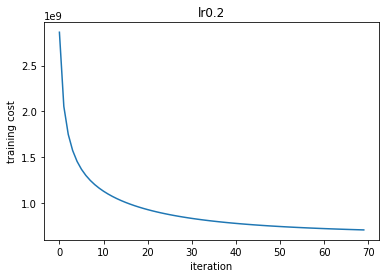

In [23]:
#Fit the Training and Testing Data
linear_regression_model(X_train.T,y_train,X_test.T,y_test,0.2,700)

In [30]:
from sklearn import linear_model

In [37]:
linear_regression=linear_model.LinearRegression()
model = linear_regression.fit(X_train,y_train)
predictions=linear_regression.predict(X_test)

In [26]:
predictions.shape

(10000,)

In [39]:
MAE_val_with_sklearn=(1/y_test.shape[0])*np.sum(np.abs(predictions-y_test))

In [ ]:
MAE_val_with_sklearn